In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_34752_Z')

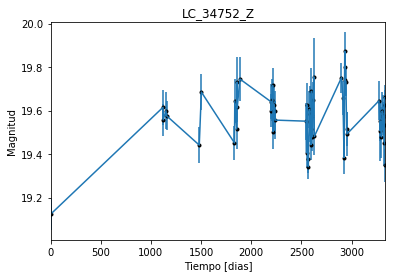

In [2]:
data = np.genfromtxt('LC_34752_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_34752_Z')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

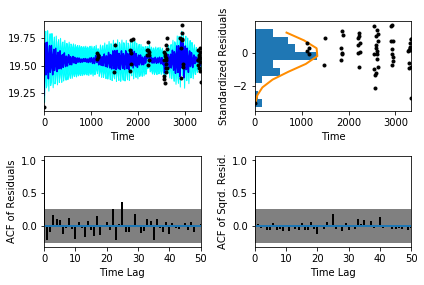

In [5]:
sample.assess_fit()

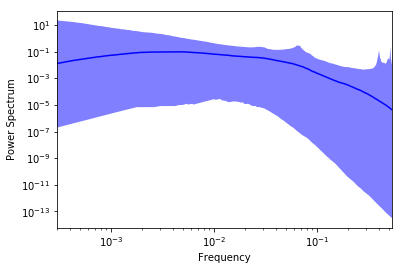

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_34752_Z')

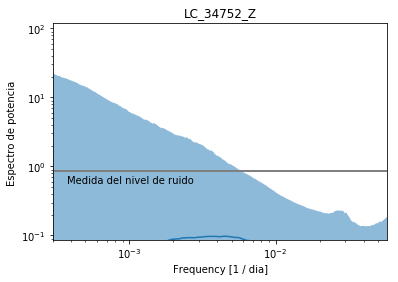

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_34752_Z')

Text(0.5,1,'Prediccion , valor esperado LC_34752_Z')

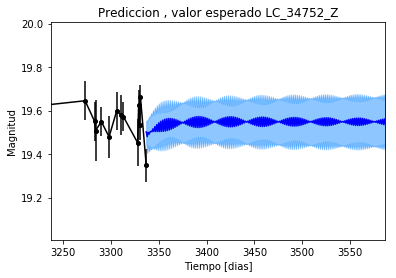

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_34752_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_34752_Z')

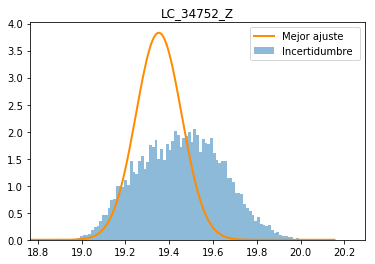

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_34752_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_34752_Z')

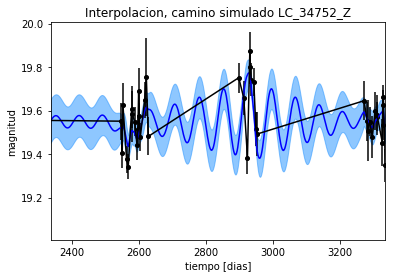

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_34752_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_34752_Z')

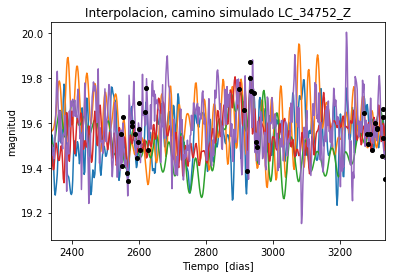

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_34752_Z')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 19241.4787741
Median: 0.0164988217705
Standard deviation: 0.204176623311
68% credibility interval: [ 0.00152577  0.21120076]
95% credibility interval: [  3.81505935e-04   7.94720601e-01]
99% credibility interval: [  3.23857816e-04   9.64434893e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 163.026751205
Median: 0.00794058178215
Standard deviation: 0.120507379674
68% credibility interval: [ 0.00099661  0.05463958]
95% credibility interval: [  3.62662390e-04   4.47820811e-01]
99% credibility interval: [  3.15380968e-04   8.68513926e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 746.342631647
Median: 0.0656787112743


In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 594.876914399
Median: 66.638763988
Standard deviation: 2.23344130799
68% credibility interval: [ 63.9314478   68.32338688]
95% credibility interval: [ 61.32720509  69.95867343]
99% credibility interval: [ 59.41446607  71.98822177]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 252.88756119
Median: 1.30808711195
Standard deviation: 2.58140649899
68% credibility interval: [ 0.13793305  5.03162019]
95% credibility interval: [ 0.02097637  8.50304725]
99% credibility interval: [  0.01211788  11.32243882]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 393.199211412
Median: 2.73376435123
Standard deviation: 13.5912511235
68% credibility interval: [  0.21425854  15.7549825 ]
95% credibility interval: [  2.91247840e-

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1604.3377333
Median: 6.89631447765e+64
Standard deviation: 5.29080088154e+139
68% credibility interval: [  1.10152734e-45   7.51756809e+97]
95% credibility interval: [  3.95649848e-079   5.93713035e+128]
99% credibility interval: [  6.60372667e-087   6.15740984e+132]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2696.50715005
Median: 19.5587101871
Standard deviation: 0.0411039337028
68% credibility interval: [ 19.53023466  19.58108492]
95% credibility interval: [ 19.45509817  19.61482218]
99% credibility interval: [ 19.36279871  19.65849615]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 315.962371868
Median: 0.0700795966852
Standard deviation: 0.302186294461
68% credibility interval: [ 0.          0.57914205]
95% credibility interval: [ 0.          1.02518843]
99% credibility interval: [ 0.          1.05391987]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 315.962371868
Median: 0.0700795966852
Standard deviation: 0.302186294461
68% credibility interval: [ 0.          0.57914205]
95% credibility interval: [ 0.          1.02518843]
99% credibility interval: [ 0.          1.05391987]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 148.66244836
Median: 0.0
Standard deviation: 0.0864498667444
68% credi

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 594.876914399
Median: 66.638763988
Standard deviation: 2.23344130799
68% credibility interval: [ 63.9314478   68.32338688]
95% credibility interval: [ 61.32720509  69.95867343]
99% credibility interval: [ 59.41446607  71.98822177]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2532.14345602
Median: 0.0145943418267
Standard deviation: 0.0148932173866
68% credibility interval: [ 0.0095416   0.02340867]
95% credibility interval: [ 0.00643742  0.05035299]
99% credibility interval: [ 0.00466441  0.09756254]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 536.202031733
Median: 1.01524171331
Standard deviation: 0.225438793826
68% credibility interval: [ 0.8517649   1.27132766]
95% credibility interval: [ 0.71097279  1.60384754]
99% credibility interval: [ 0.61799262  1.81718916]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 805.104087539
Median: 4.83765635073e-67
Standard deviation: 3.30121453219
68% credibility interval: [  7.80015555e-100   8.25283996e-002]
95% credibility interval: [  7.81393973e-131   5.50021188e+000]
99% credibility interval: [  2.46095294e-134   2.35632171e+001]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 19241.4787741
Median: (-0.103665154534-0.413442248794j)
Standard deviation: 2.29146527765
68% credibility interval: [-1.32701353-2.87563082j -0.00958667-0.35866374j]
95% credibility interval: [ -4.99337680e+00+0.j          -2.39707249e-03-3.22307823j]
99% credibility interval: [ -6.05972315e+00-6.45884133j  -2.03485867e-03-1.01482006j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 163.026751205
Median: (-0.049892146784+0.343649444175j)
Standard deviation: 2.04409878965
68% credibility interval: [-0.34331061+5.36937434j -0.00626188+0.43692793j]
95% credibility interval: [ -2.81374114e+00+3.52634722j  -2.27867500e-03+0.j        ]
99% credibility interval: [ -5.45703394e+00 +5.43046484e+00j  -1.98159706e-03 +4.27911039e